In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Attrition Data.csv')

In [3]:
df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


# Here below we check for any missing null values present in the columns using df.info() function

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


# Here we check for descriptive statistics and to check the skewness (distribution) of the data

In [5]:
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [6]:
#distance from home, monthly income,years at company

# Splitting the features and target to train the model

In [7]:
x=df.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12]]

In [8]:
x

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [9]:
y=df.iloc[:,1:2]
y

,Attrition
0,Yes
1,No
2,Yes
3,No
4,No
...,...
1465,No
1466,No
1467,No
1468,No


In [10]:
a=x.select_dtypes('int64').columns
a

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

# Checking the skewness to check for outliers

Age
Age                          36.923810
DistanceFromHome              9.192517
Education                     2.912925
EnvironmentSatisfaction       2.721769
JobSatisfaction               2.728571
MonthlyIncome              6502.931293
NumCompaniesWorked            2.693197
WorkLifeBalance               2.761224
YearsAtCompany                7.008163
dtype: float64
Age                          36.0
DistanceFromHome              7.0
Education                     3.0
EnvironmentSatisfaction       3.0
JobSatisfaction               3.0
MonthlyIncome              4919.0
NumCompaniesWorked            2.0
WorkLifeBalance               3.0
YearsAtCompany                5.0
dtype: float64


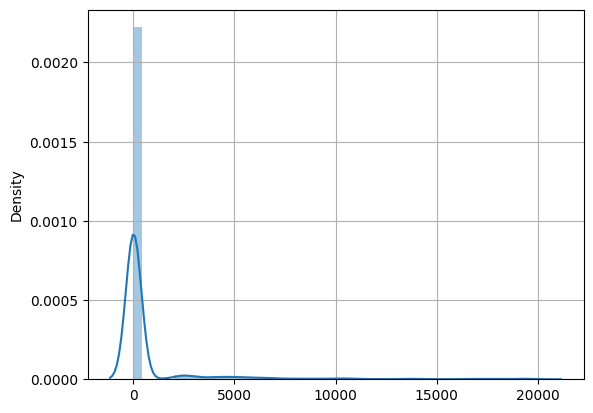

DistanceFromHome
Age                          36.923810
DistanceFromHome              9.192517
Education                     2.912925
EnvironmentSatisfaction       2.721769
JobSatisfaction               2.728571
MonthlyIncome              6502.931293
NumCompaniesWorked            2.693197
WorkLifeBalance               2.761224
YearsAtCompany                7.008163
dtype: float64
Age                          36.0
DistanceFromHome              7.0
Education                     3.0
EnvironmentSatisfaction       3.0
JobSatisfaction               3.0
MonthlyIncome              4919.0
NumCompaniesWorked            2.0
WorkLifeBalance               3.0
YearsAtCompany                5.0
dtype: float64


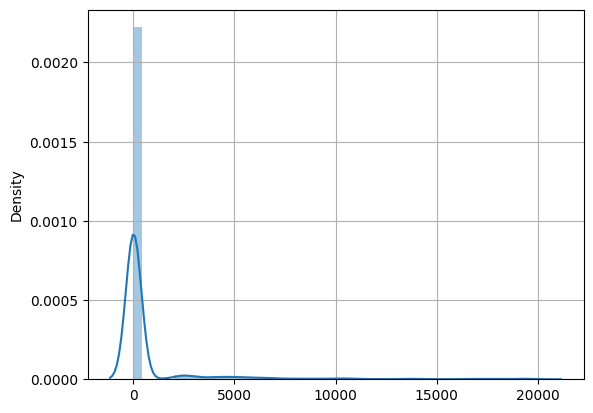

Education
Age                          36.923810
DistanceFromHome              9.192517
Education                     2.912925
EnvironmentSatisfaction       2.721769
JobSatisfaction               2.728571
MonthlyIncome              6502.931293
NumCompaniesWorked            2.693197
WorkLifeBalance               2.761224
YearsAtCompany                7.008163
dtype: float64
Age                          36.0
DistanceFromHome              7.0
Education                     3.0
EnvironmentSatisfaction       3.0
JobSatisfaction               3.0
MonthlyIncome              4919.0
NumCompaniesWorked            2.0
WorkLifeBalance               3.0
YearsAtCompany                5.0
dtype: float64


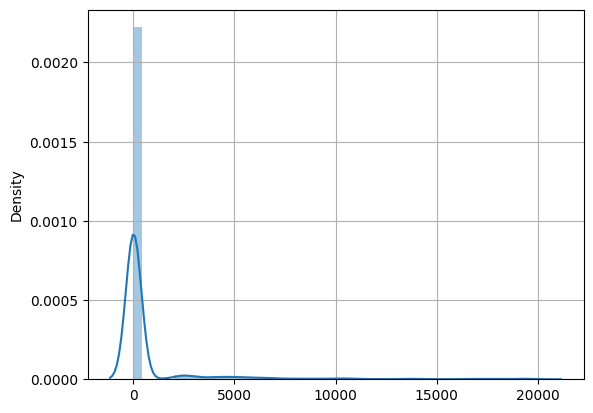

EnvironmentSatisfaction
Age                          36.923810
DistanceFromHome              9.192517
Education                     2.912925
EnvironmentSatisfaction       2.721769
JobSatisfaction               2.728571
MonthlyIncome              6502.931293
NumCompaniesWorked            2.693197
WorkLifeBalance               2.761224
YearsAtCompany                7.008163
dtype: float64
Age                          36.0
DistanceFromHome              7.0
Education                     3.0
EnvironmentSatisfaction       3.0
JobSatisfaction               3.0
MonthlyIncome              4919.0
NumCompaniesWorked            2.0
WorkLifeBalance               3.0
YearsAtCompany                5.0
dtype: float64


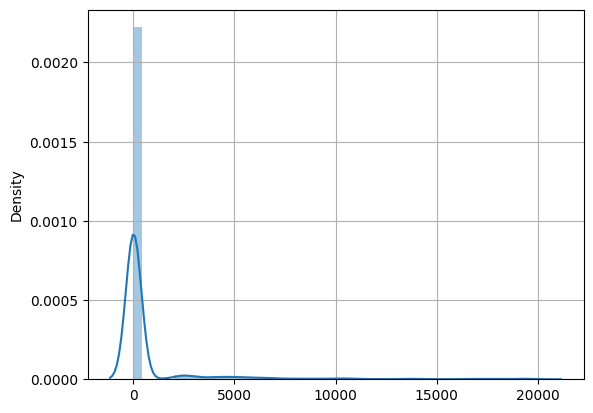

JobSatisfaction
Age                          36.923810
DistanceFromHome              9.192517
Education                     2.912925
EnvironmentSatisfaction       2.721769
JobSatisfaction               2.728571
MonthlyIncome              6502.931293
NumCompaniesWorked            2.693197
WorkLifeBalance               2.761224
YearsAtCompany                7.008163
dtype: float64
Age                          36.0
DistanceFromHome              7.0
Education                     3.0
EnvironmentSatisfaction       3.0
JobSatisfaction               3.0
MonthlyIncome              4919.0
NumCompaniesWorked            2.0
WorkLifeBalance               3.0
YearsAtCompany                5.0
dtype: float64


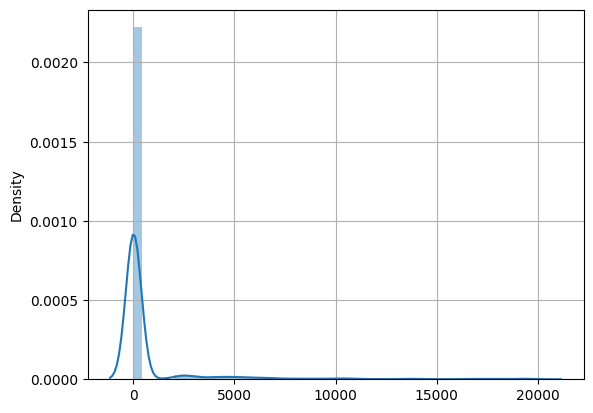

MonthlyIncome
Age                          36.923810
DistanceFromHome              9.192517
Education                     2.912925
EnvironmentSatisfaction       2.721769
JobSatisfaction               2.728571
MonthlyIncome              6502.931293
NumCompaniesWorked            2.693197
WorkLifeBalance               2.761224
YearsAtCompany                7.008163
dtype: float64
Age                          36.0
DistanceFromHome              7.0
Education                     3.0
EnvironmentSatisfaction       3.0
JobSatisfaction               3.0
MonthlyIncome              4919.0
NumCompaniesWorked            2.0
WorkLifeBalance               3.0
YearsAtCompany                5.0
dtype: float64


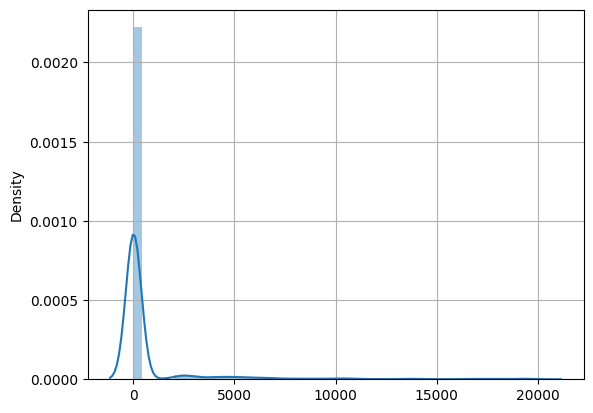

NumCompaniesWorked
Age                          36.923810
DistanceFromHome              9.192517
Education                     2.912925
EnvironmentSatisfaction       2.721769
JobSatisfaction               2.728571
MonthlyIncome              6502.931293
NumCompaniesWorked            2.693197
WorkLifeBalance               2.761224
YearsAtCompany                7.008163
dtype: float64
Age                          36.0
DistanceFromHome              7.0
Education                     3.0
EnvironmentSatisfaction       3.0
JobSatisfaction               3.0
MonthlyIncome              4919.0
NumCompaniesWorked            2.0
WorkLifeBalance               3.0
YearsAtCompany                5.0
dtype: float64


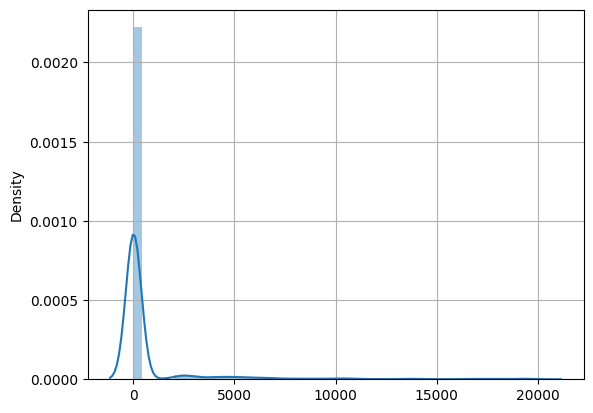

WorkLifeBalance
Age                          36.923810
DistanceFromHome              9.192517
Education                     2.912925
EnvironmentSatisfaction       2.721769
JobSatisfaction               2.728571
MonthlyIncome              6502.931293
NumCompaniesWorked            2.693197
WorkLifeBalance               2.761224
YearsAtCompany                7.008163
dtype: float64
Age                          36.0
DistanceFromHome              7.0
Education                     3.0
EnvironmentSatisfaction       3.0
JobSatisfaction               3.0
MonthlyIncome              4919.0
NumCompaniesWorked            2.0
WorkLifeBalance               3.0
YearsAtCompany                5.0
dtype: float64


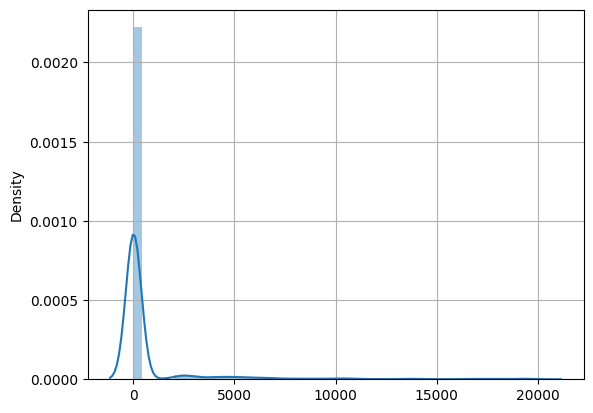

YearsAtCompany
Age                          36.923810
DistanceFromHome              9.192517
Education                     2.912925
EnvironmentSatisfaction       2.721769
JobSatisfaction               2.728571
MonthlyIncome              6502.931293
NumCompaniesWorked            2.693197
WorkLifeBalance               2.761224
YearsAtCompany                7.008163
dtype: float64
Age                          36.0
DistanceFromHome              7.0
Education                     3.0
EnvironmentSatisfaction       3.0
JobSatisfaction               3.0
MonthlyIncome              4919.0
NumCompaniesWorked            2.0
WorkLifeBalance               3.0
YearsAtCompany                5.0
dtype: float64


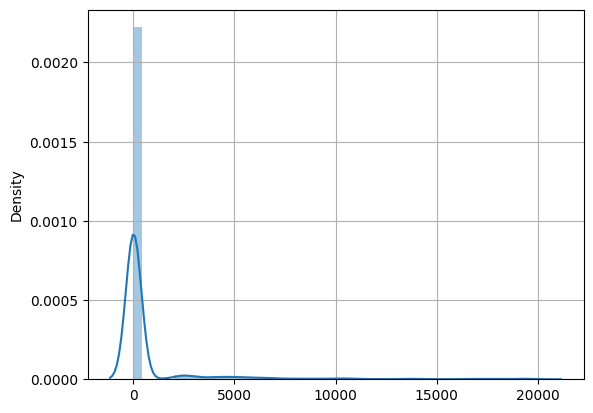

In [12]:
for i in x[a]:
    print(i)
    print(x[a].mean())
    print(x[a].median())
    sns.distplot(x[a])
    plt.grid()
    plt.show()

# Step 2: Outlier Removal

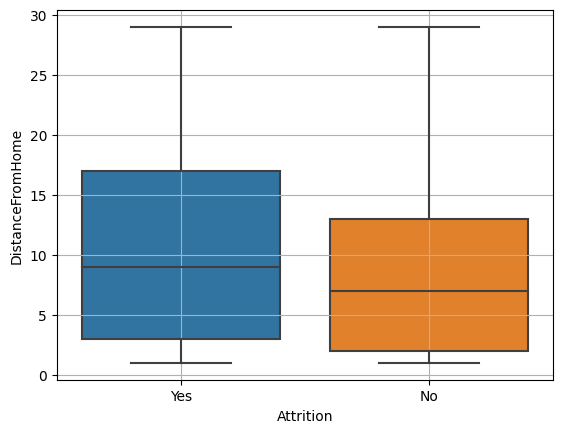

In [13]:
sns.boxplot(data=df,x='Attrition',y='DistanceFromHome')
plt.grid()
plt.show()

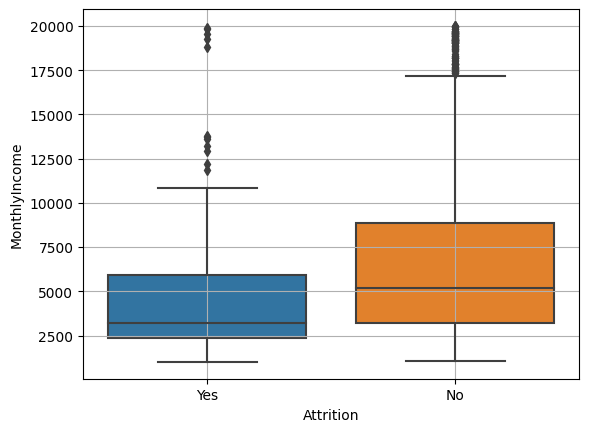

In [14]:
sns.boxplot(data=df,x='Attrition',y='MonthlyIncome')
plt.grid()
plt.show()

In [15]:
a=x[(x["MonthlyIncome"]>11000) & (y['Attrition']=='Yes')].index
a

Int64Index([45, 271, 435, 568, 595, 706, 749, 813, 838, 913, 975, 1223], dtype='int64')

In [16]:
b=x[(x["MonthlyIncome"]>17000) & (y['Attrition']=='No')].index
b

Int64Index([  25,   29,   62,  105,  106,  112,  123,  147,  165,  186,  187,
             190,  231,  233,  237,  244,  257,  270,  279,  280,  290,  314,
             326,  329,  392,  400,  411,  417,  425,  429,  473,  477,  497,
             535,  538,  584,  588,  609,  653,  699,  710,  714,  716,  741,
             746,  755,  766,  770,  799,  810,  814,  851,  858,  861,  867,
             869,  894,  898,  899,  904,  907,  916,  918,  922,  936,  937,
             954,  955,  956, 1008, 1009, 1024, 1055, 1116, 1126, 1129, 1135,
            1140, 1154, 1184, 1185, 1242, 1264, 1277, 1330, 1331, 1351, 1374,
            1377, 1401, 1437, 1443],
           dtype='int64')

In [17]:
x.drop(a,inplace=True)

In [18]:
y.drop([45, 271, 435, 568, 595, 706, 749, 813, 838, 913, 975, 1223],inplace=True)

In [19]:
x.drop(b,inplace=True)

In [20]:
y.drop([25,   29,   62,  105,  106,  112,  123,  147,  165,  186,  187,
             190,  231,  233,  237,  244,  257,  270,  279,  280,  290,  314,
             326,  329,  392,  400,  411,  417,  425,  429,  473,  477,  497,
             535,  538,  584,  588,  609,  653,  699,  710,  714,  716,  741,
             746,  755,  766,  770,  799,  810,  814,  851,  858,  861,  867,
             869,  894,  898,  899,  904,  907,  916,  918,  922,  936,  937,
             954,  955,  956, 1008, 1009, 1024, 1055, 1116, 1126, 1129, 1135,
            1140, 1154, 1184, 1185, 1242, 1264, 1277, 1330, 1331, 1351, 1374,
            1377, 1401, 1437, 1443],inplace=True)

In [21]:
x

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,Sales,2,3,Medical,4,2,Married,5390,2,2,9


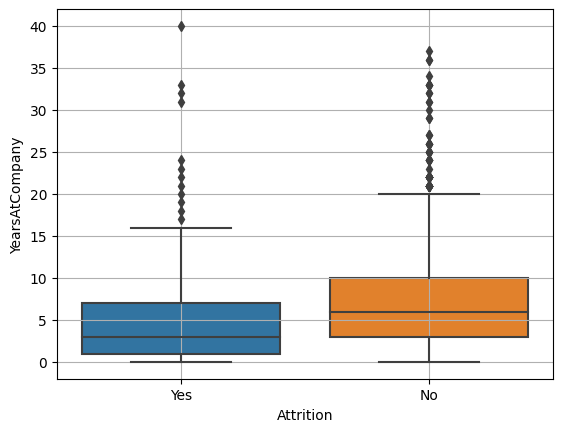

In [22]:
sns.boxplot(data=df,x='Attrition',y='YearsAtCompany')
plt.grid()
plt.show()

In [23]:
c=x[(x["YearsAtCompany"]>16) & (y['Attrition']=='Yes')].index
c

Int64Index([126, 752, 789, 1111], dtype='int64')

In [24]:
d=x[(x["YearsAtCompany"]>20) & (y['Attrition']=='No')].index
d

Int64Index([  18,   28,   63,   90,   98,  119,  178,  300,  311,  390,  544,
             561,  592,  677,  738,  753,  914,  926,  962, 1086, 1096, 1138,
            1221, 1225, 1295, 1303],
           dtype='int64')

In [25]:
x.drop(c,inplace=True)

In [26]:
y.drop([126, 752, 789, 1111],inplace=True)

In [27]:
x.drop(d,inplace=True)

In [28]:
y.drop([18,   28,   63,   90,   98,  119,  178,  300,  311,  390,  544,
             561,  592,  677,  738,  753,  914,  926,  962, 1086, 1096, 1138,
            1221, 1225, 1295, 1303],inplace=True)

In [29]:
x

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,Sales,2,3,Medical,4,2,Married,5390,2,2,9


# Checking the correlation of the columns

In [30]:
df.corr().style.background_gradient()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Age,1.000000,-0.001686,0.208034,0.010146,-0.004892,0.497855,0.299635,-0.021490,0.311309
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,-0.003669,-0.017014,-0.029251,-0.026556,0.009508
Education,0.208034,0.021042,1.000000,-0.027128,-0.011296,0.094961,0.126317,0.009819,0.069114
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.006784,-0.006259,0.012594,0.027627,0.001458
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,1.000000,-0.007157,-0.055699,-0.019459,-0.003803
MonthlyIncome,0.497855,-0.017014,0.094961,-0.006259,-0.007157,1.000000,0.149515,0.030683,0.514285
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,-0.055699,0.149515,1.000000,-0.008366,-0.118421
WorkLifeBalance,-0.021490,-0.026556,0.009819,0.027627,-0.019459,0.030683,-0.008366,1.000000,0.012089
YearsAtCompany,0.311309,0.009508,0.069114,0.001458,-0.003803,0.514285,-0.118421,0.012089,1.000000


In [31]:
y

,Attrition
0,Yes
1,No
2,Yes
3,No
4,No
...,...
1465,No
1466,No
1467,No
1468,No


In [32]:
x

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,Sales,2,3,Medical,4,2,Married,5390,2,2,9


# Step 4:- Convert Categorical Data into Numerical Data

In [34]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
x[['Department','EducationField','MaritalStatus']]=oe.fit_transform(x[['Department','EducationField','MaritalStatus']])

In [35]:
x

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,2.0,1,2,1.0,2,4,2.0,5993,8,1,6
1,49,1.0,8,1,1.0,3,2,1.0,5130,1,3,10
2,37,1.0,2,2,4.0,4,3,2.0,2090,6,3,0
3,33,1.0,3,4,1.0,4,3,1.0,2909,1,3,8
4,27,1.0,2,1,3.0,1,2,1.0,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.0,23,2,3.0,3,4,1.0,2571,4,3,5
1466,39,1.0,6,1,3.0,4,1,1.0,9991,4,3,7
1467,27,1.0,4,3,1.0,2,2,1.0,6142,1,3,6
1468,49,2.0,2,3,3.0,4,2,1.0,5390,2,2,9


In [36]:
y

,Attrition
0,Yes
1,No
2,Yes
3,No
4,No
...,...
1465,No
1466,No
1467,No
1468,No


In [37]:
from sklearn.preprocessing import OrdinalEncoder
le=OrdinalEncoder()
y.iloc[:,:]=le.fit_transform(y.iloc[:,:])

In [38]:
y

,Attrition
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
1465,0.0
1466,0.0
1467,0.0
1468,0.0


In [39]:
y['Attrition']=y['Attrition'].astype('int64')

In [40]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [41]:
xtrain

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
10,35,1.0,16,3,3.0,1,2,1.0,2426,0,3,5
1094,40,2.0,9,2,3.0,1,1,1.0,5473,0,4,8
924,35,1.0,6,1,1.0,3,3,1.0,3506,0,3,3
740,35,1.0,10,3,4.0,2,4,0.0,3917,1,2,3
350,42,0.0,2,1,5.0,3,3,0.0,2696,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
788,28,1.0,10,3,4.0,3,3,2.0,3660,3,4,8
1007,29,1.0,14,1,4.0,3,4,2.0,7553,0,3,8
1214,44,1.0,2,3,1.0,3,4,1.0,7879,1,3,8
261,38,2.0,2,2,1.0,4,4,1.0,5249,3,3,8


In [42]:
ytrain

,Attrition
10,0
1094,0
924,0
740,0
350,0
...,...
788,0
1007,1
1214,0
261,0


In [43]:
xtest

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
1430,38,1.0,10,3,3.0,2,3,1.0,13206,3,3,18
1203,53,1.0,24,4,3.0,2,4,1.0,7005,3,3,4
317,52,1.0,8,4,3.0,3,2,1.0,4941,2,2,8
662,20,2.0,2,3,3.0,3,3,2.0,2044,1,2,2
632,42,1.0,2,1,3.0,2,4,2.0,2515,5,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
150,40,1.0,26,3,3.0,2,2,0.0,5605,1,3,20
704,35,2.0,3,4,1.0,4,4,0.0,7823,6,3,10
999,42,0.0,10,3,0.0,3,1,1.0,16799,0,3,20
804,48,1.0,1,4,3.0,1,4,2.0,16885,2,2,5


In [44]:
ytest

,Attrition
1430,0
1203,0
317,1
662,1
632,0
...,...
150,0
704,0
999,0
804,0


# Step 5 :- Model Building

In [45]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()


In [46]:
logreg.fit(xtrain,ytrain)


LogisticRegression()

In [47]:
ypred=logreg.predict(xtest)

In [48]:
ypred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [50]:
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f'Accuracy:- {ac}\n {cm}\n {cr}')

Accuracy:- 0.8778054862842892
 [[346   1]
 [ 48   6]]
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       347
           1       0.86      0.11      0.20        54

    accuracy                           0.88       401
   macro avg       0.87      0.55      0.57       401
weighted avg       0.88      0.88      0.83       401



In [51]:
train=logreg.score(xtrain,ytrain)
test=logreg.score(xtest,ytest)
print(f'Training accuracy:- {train}\ntesting accuracy:- {test}')

Training accuracy:- 0.8352941176470589
testing accuracy:- 0.8778054862842892


In [52]:
y['Attrition'].value_counts()

0    1115
1     221
Name: Attrition, dtype: int64

# Improving accuracy

In [53]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [54]:
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f'Accuracy:- {ac}\n {cm}\n {cr}')

Accuracy:- 0.8329177057356608
 [[331   4]
 [ 63   3]]
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       335
           1       0.43      0.05      0.08        66

    accuracy                           0.83       401
   macro avg       0.63      0.52      0.50       401
weighted avg       0.77      0.83      0.77       401



In [55]:
train=logreg.score(xtrain,ytrain)
test=logreg.score(xtest,ytest)
print(f'Training accuracy:- {train}\ntesting accuracy:- {test}')

Training accuracy:- 0.8502673796791443
testing accuracy:- 0.8428927680798005


In [56]:
x

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,2.0,1,2,1.0,2,4,2.0,5993,8,1,6
1,49,1.0,8,1,1.0,3,2,1.0,5130,1,3,10
2,37,1.0,2,2,4.0,4,3,2.0,2090,6,3,0
3,33,1.0,3,4,1.0,4,3,1.0,2909,1,3,8
4,27,1.0,2,1,3.0,1,2,1.0,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.0,23,2,3.0,3,4,1.0,2571,4,3,5
1466,39,1.0,6,1,3.0,4,1,1.0,9991,4,3,7
1467,27,1.0,4,3,1.0,2,2,1.0,6142,1,3,6
1468,49,2.0,2,3,3.0,4,2,1.0,5390,2,2,9


# Prediction of new observation fed to the model

In [57]:
def attrition():
    age=int(input('Enter Age:-'))
    department=input('Enter department:-')
    distancefromhome=int(input('Enter distance from home:-'))
    education=int(input('Enter Education level:- '))
    educationfield=input('Enter Education Field:-')
    environmentalsatisfaction=int(input('Enter Environmental Satisifaction score:-'))
    jobsatisfaction=int(input('Enter jobsatisfaction:-'))
    maritalstatus=input('Enter marital Status:- ')
    monthlyincome=int(input('Enter MonthlyIncome:-'))
    numcompaniesworked=int(input('Enter Number of Companies Worked:- '))
    worklifebalance=int(input('Enter work life balance score:- '))
    yearsatcompany=int(input('Enter years at company:- '))
    
    
    newob=[age,department,distancefromhome,education,educationfield,environmentalsatisfaction,
          jobsatisfaction,maritalstatus,monthlyincome,numcompaniesworked,worklifebalance,
           yearsatcompany]
    newob[1],newob[4],newob[7]=oe.fit_transform([[newob[1],newob[4],newob[7]]])[0]
    a=logreg.predict([newob])[0]
    return a
    

In [58]:
attrition()

Enter Age:-35
Enter department:-Sales
Enter distance from home:-10
Enter Education level:- 3
Enter Education Field:-Life Sciences
Enter Environmental Satisifaction score:-5
Enter jobsatisfaction:-5
Enter marital Status:- Single
Enter MonthlyIncome:-15000
Enter Number of Companies Worked:- 5
Enter work life balance score:- 5
Enter years at company:- 5


0

# Here 0 means the employee will not leave the company and if we get 1 in the output that means the employee will leave the company